# BAX Emittance Minimization (LCLS-II) - Includes Bmag calculation
In this notebook, we hope to demonstrate Bayesian Algorithm Execution (BAX) in Xopt as a means of minimizing the emittance at LCLS-II. BAX is a generalization of Bayesian Optimization that seeks to acquire observations that provide our model with maximal information about our property of interest. In this example, our property of interest is the minimal emittance and its location in tuning-parameter-space. See https://arxiv.org/pdf/2209.04587.pdf for details.

In [1]:
# set up env for running on SLAC production servers
import os
os.environ['OMP_NUM_THREADS']=str(6)

In [2]:
run_dir = '/home/physics/ml_tuning/20240324_LCLS_II_Injector'

# Read pv info from YAML files

In [3]:
import sys
import yaml
sys.path.append("../../")
sys.path.append("../../../")

from common import get_pv_objects, save_reference_point, set_magnet_strengths, \
    measure_pvs

In [4]:
pv_bounds = yaml.safe_load(open("../../pv_bounds.yml"))
pv_objects = get_pv_objects("../../tracked_pvs.yml")

In [5]:
pv_bounds

{'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
 'QUAD:HTR:120:BCTRL': [-4.48, 1],
 'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
 'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
 'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
 'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
 'SOLN:GUNB:823:BCTRL': [0.021, 0.0255]}

# load reference point
Also define a function to write the reference values to the pvs

In [6]:
reference = yaml.safe_load(open("../../reference.yml"))

def reset_pvs():
    set_magnet_strengths(reference, pv_objects, validate=False)

In [7]:
reference

{'QUAD:COL0:320:BCTRL': 0.87065,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'SOLN:GUNB:823:BCTRL': 0.025}

In [80]:
reset_pvs()

QUAD:COL0:320:BCTRL 0.87065
QUAD:GUNB:212:1:BCTRL 0.002411
QUAD:GUNB:212:2:BCTRL 0.002356
QUAD:GUNB:823:1:BCTRL 0.0032658
QUAD:GUNB:823:2:BCTRL 0.002111
QUAD:HTR:120:BCTRL -1.8589368
QUAD:HTR:140:BCTRL 1.7526053
QUAD:HTR:300:BCTRL -1.2604819
QUAD:HTR:320:BCTRL 1.04152
SOLN:GUNB:212:BCTRL 0.0441892
SOLN:GUNB:823:BCTRL 0.025


In [9]:
from scripts.image import ImageDiagnostic, ROI
import yaml

fname = 'otr_diagnostic.yml' #run_dir + "OTRS_HTR_330_config.yml"

roi = ROI(
    ycenter=967,
    xcenter=878,
    xwidth=600,
    ywidth=600
)
    

image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.roi = roi
image_diagnostic.min_log_intensity = 5.0
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
print(image_diagnostic.yaml())


screen_name: OTRS:HTR:330
array_data_suffix: Image:ArrayData
array_n_cols_suffix: Image:ArraySize0_RBV
array_n_rows_suffix: Image:ArraySize1_RBV
resolution_suffix: RESOLUTION
resolution: 19.24
beam_shutter_pv: TPR:LGUN:TS01:0:TRG00_SYS2_TCTL
extra_pvs: []
background_file: null
save_image_location: /home/physics/ml_tuning/20240324_LCLS_II_Injector
roi: {xcenter: 878, ycenter: 967, xwidth: 600, ywidth: 600}
min_log_intensity: 5.0
bounding_box_half_width: 3.0
wait_time: 1.0
n_fitting_restarts: 2
visualize: false
return_statistics: false
threshold: 0.0
apply_bounding_box_constraint: true
testing: false



In [10]:
image_diagnostic.measure_background()

array([[0. , 0. , 0.2, ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0. , 0. , ..., 0.2, 0. , 0. ]])

displaying image
fitting image
{'Cx': 290.93529006797297,
 'Cy': 280.86464539062376,
 'Sx': 11.32407865949241,
 'Sy': 9.762155298779293,
 'bb_penalty': -235.2168894356618,
 'log10_total_intensity': 5.592817174789852,
 'total_intensity': 391576.9999999998}


{'Cx': 290.93529006797297,
 'Cy': 280.86464539062376,
 'Sx': 217.87527340863394,
 'Sy': 187.82386794851357,
 'bb_penalty': -235.2168894356618,
 'total_intensity': 391576.9999999998,
 'log10_total_intensity': 5.592817174789852}

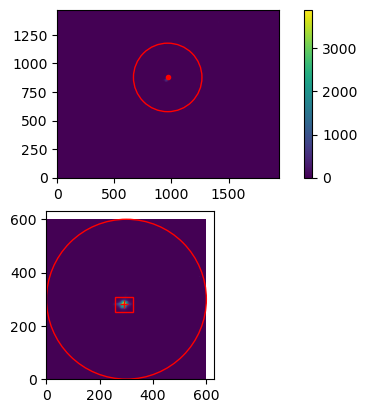

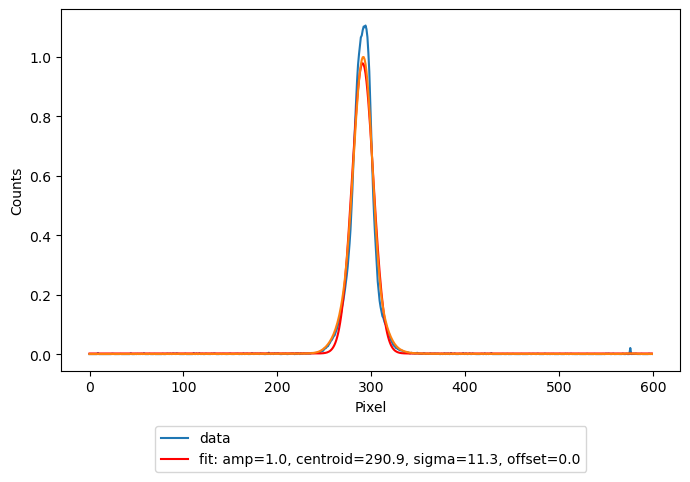

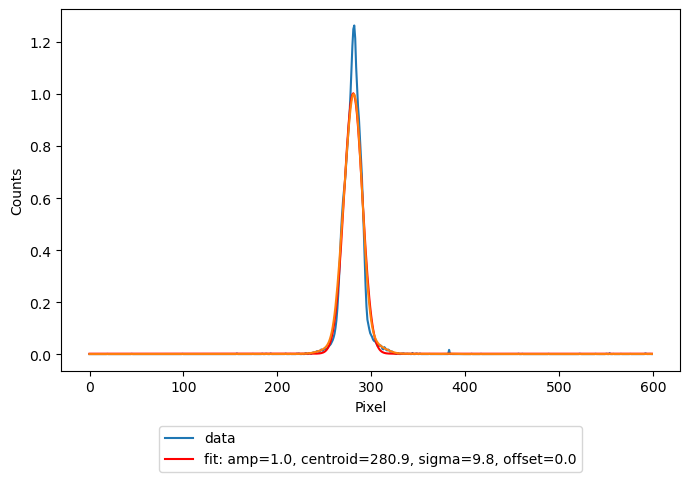

In [11]:
image_diagnostic.test_measurement()

# Imports

In [12]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
import torch
from xopt import Xopt
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
import numpy as np
import random

# Evaluator

In [13]:
import time
# define function to measure the total size on OTR4
def eval_beamsize(inputs):
    
    # set pvs and wait for BACT to settle to correct values (validate=True)
    set_magnet_strengths(inputs, pv_objects, validate=True)
    time.sleep(0.5)
    # measure all pvs - except for names in inputs
    results = measure_pvs(
        [name for name in pv_objects.keys() if name not in inputs], pv_objects 
    )

    # do some calculations
    results["time"] = time.time()

    # add beam size measurement to results dict
    beamsize_results = image_diagnostic.measure_beamsize(1)
    results["Sx_mm"] = np.array(beamsize_results["Sx"]) * 1e-3
    results["Sy_mm"] = np.array(beamsize_results["Sy"]) * 1e-3

    #add beam size squared (mm^2)
    results["xrms_sq"] = results["Sx_mm"]**2
    results["yrms_sq"] = results["Sy_mm"]**2
    results = beamsize_results | results
    return results

evaluator = Evaluator(function=eval_beamsize)


In [14]:
eval_beamsize({})

fitting image


{'Cx': 290.82700396433677,
 'Cy': 280.8054197685956,
 'Sx': 235.34758918774534,
 'Sy': 186.25309154524624,
 'bb_penalty': -233.43616419912104,
 'total_intensity': 379485.2,
 'log10_total_intensity': 5.579194842988631,
 'save_filename': '/home/physics/ml_tuning/20240324_LCLS_II_Injector/OTRS_HTR_330_1711341081.h5',
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'SOLN:GUNB:823:BCTRL': 0.025,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'ACCL:GUNB:455:PDES': -121.7,
 'ACCL:L0B:0110:ADES': 6.5,
 'ACCL:L0B:0110:PDES': 0.0,
 'ACCL:L0B:0130:PDES': 0.0,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:COL0:320:BCTRL': 0.87065,
 'time': 1711341081.2147899,
 'Sx_mm': 0.23534758918774534,
 'Sy_mm': 0.18625309154524625,
 'xrms_sq': 0.05538848773648375,
 'yrms_sq': 0.03469021411016188}

## VOCS

In [44]:
# create Xopt objects
from xopt import VOCS

IMAGE_CONSTRAINTS = {
            "bb_penalty": ["LESS_THAN", 0.0],
        }

vocs = VOCS(
    variables = {
        # 'SOLN:GUNB:823:BCTRL': [0.0225, 0.0285],
        'QUAD:HTR:120:BCTRL': [-4.0, 1.0],
        # 'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
        # 'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
        #'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
        #'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
        #'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
         'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
         'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
         'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
    },
    constraints = IMAGE_CONSTRAINTS,
    observables = ["xrms_sq", "yrms_sq"],
)
vocs.variable_names

['QUAD:HTR:120:BCTRL',
 'QUAD:HTR:140:BCTRL',
 'QUAD:HTR:300:BCTRL',
 'QUAD:HTR:320:BCTRL']

# Run Bayesian Exploration on a grid

In [45]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.bayesian_exploration import BayesianExplorationGenerator
from xopt.numerical_optimizer import GridOptimizer
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
sys.path.append("../../emitopt/")

meas_dim = 3
tuning_dims = [0,1,2]

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {
    'xrms_sq': scaled_covar_module,
    "yrms_sq": deepcopy(scaled_covar_module)
}
# covar_module_dict = {}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

generator = BayesianExplorationGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    numerical_optimizer=GridOptimizer(n_grid_points=5),
    n_interpolate_points=5
)

from xopt import Xopt
X_bayes_exp = Xopt(
    vocs=vocs,
    generator=generator,
    evaluator=evaluator,
    strict=True
)

## sample in local area around reference point

In [46]:
from epics import caget_many
from xopt.utils import get_local_region

reset_pvs()
current_value = dict(
    zip(
        X_bayes_exp.vocs.variable_names,
        caget_many(X_bayes_exp.vocs.variable_names)
    )
)
print(current_value)


random_sample_region = get_local_region(current_value,X_bayes_exp.vocs, fraction=0.25)
X_bayes_exp.random_evaluate(10, custom_bounds=random_sample_region)

QUAD:COL0:320:BCTRL 0.87065
QUAD:GUNB:212:1:BCTRL 0.002411
QUAD:GUNB:212:2:BCTRL 0.002356
QUAD:GUNB:823:1:BCTRL 0.0032658
QUAD:GUNB:823:2:BCTRL 0.002111
QUAD:HTR:120:BCTRL -1.8589368
QUAD:HTR:140:BCTRL 1.7526053
QUAD:HTR:300:BCTRL -1.2604819
QUAD:HTR:320:BCTRL 1.04152
SOLN:GUNB:212:BCTRL 0.0441892
SOLN:GUNB:823:BCTRL 0.025
{'QUAD:HTR:120:BCTRL': -1.8589368, 'QUAD:HTR:140:BCTRL': 1.7526053, 'QUAD:HTR:300:BCTRL': -1.2604819, 'QUAD:HTR:320:BCTRL': 1.04152}
QUAD:HTR:120:BCTRL -2.427318611950801
QUAD:HTR:140:BCTRL 2.0345231885243513
QUAD:HTR:300:BCTRL 0.5322401861148219
QUAD:HTR:320:BCTRL 3.0933549568727567
fitting image
QUAD:HTR:120:BCTRL -2.329290496864833
QUAD:HTR:140:BCTRL 2.8481466362820775
QUAD:HTR:300:BCTRL 0.6789335145493997
QUAD:HTR:320:BCTRL -0.7848201899127936
fitting image
QUAD:HTR:120:BCTRL -1.292900778107963
QUAD:HTR:140:BCTRL 1.2858500955225867
QUAD:HTR:300:BCTRL -1.0968554622448115
QUAD:HTR:320:BCTRL 1.8960956514791194
fitting image
QUAD:HTR:120:BCTRL -1.2293703379304977
QUA

,QUAD:HTR:120:BCTRL,QUAD:HTR:140:BCTRL,QUAD:HTR:300:BCTRL,QUAD:HTR:320:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:COL0:320:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,-2.427319,2.034523,0.532240,3.093355,296.851319,272.254118,164.676435,479.867354,-193.457111,407804.0,...,0.0,0.0,0.87065,1.711344e+09,0.164676,0.479867,0.027118,0.230273,6.633624,False
1,-2.329290,2.848147,0.678934,-0.784820,312.822720,276.454885,253.828216,235.043422,-220.192668,433367.8,...,0.0,0.0,0.87065,1.711345e+09,0.253828,0.235043,0.064429,0.055245,7.966853,False
2,-1.292901,1.285850,-1.096855,1.896096,285.866886,266.989253,220.277363,537.925192,-173.458195,416154.6,...,0.0,0.0,0.87065,1.711345e+09,0.220277,0.537925,0.048522,0.289364,5.964318,False
3,-1.229370,3.886700,-2.283392,2.796613,NaN,NaN,NaN,NaN,7.605104,407075.8,...,0.0,0.0,0.87065,1.711345e+09,NaN,NaN,NaN,NaN,5.978724,False
4,-1.346385,-0.299044,-2.535146,2.857860,244.013542,300.453509,546.517797,375.779966,-146.948854,407311.0,...,0.0,0.0,0.87065,1.711345e+09,0.546518,0.375780,0.298682,0.141211,13.180692,False
5,-2.374683,0.388635,0.626050,1.859623,266.909270,290.558191,357.545779,1218.593698,-81.657304,348667.0,...,0.0,0.0,0.87065,1.711345e+09,0.357546,1.218594,0.127839,1.484971,14.863477,False
6,-2.901626,-0.446113,-1.030869,0.585291,226.304093,341.383369,854.888888,728.297064,-41.438293,304807.4,...,0.0,0.0,0.87065,1.711345e+09,0.854889,0.728297,0.730835,0.530417,13.088426,False
7,-2.175965,2.331078,-1.825080,-0.790829,304.660254,302.865233,202.669046,148.513137,-255.367653,447900.2,...,0.0,0.0,0.87065,1.711345e+09,0.202669,0.148513,0.041075,0.022056,5.892443,False
8,-1.220764,3.805420,-2.520347,0.723022,366.528895,276.408217,947.402802,1056.048426,-14.790065,431041.2,...,0.0,0.0,0.87065,1.711345e+09,0.947403,1.056048,0.897572,1.115238,3.916245,False
9,-2.010320,0.716116,-3.027730,2.996504,261.829465,306.972153,465.445629,428.849478,-166.895028,444021.4,...,0.0,0.0,0.87065,1.711345e+09,0.465446,0.428849,0.216640,0.183912,7.089270,False


In [47]:
import time
start = time.time()
for i in range(5):
    X_bayes_exp.step()
print(time.time() - start)

QUAD:HTR:120:BCTRL -2.408253928166276
QUAD:HTR:140:BCTRL 1.0204316740359918
QUAD:HTR:300:BCTRL -3.314252066548928
QUAD:HTR:320:BCTRL 1.5033668284184385
fitting image
QUAD:HTR:120:BCTRL -2.8061879427296264
QUAD:HTR:140:BCTRL 1.324747559810136
QUAD:HTR:300:BCTRL -3.600774055671889
QUAD:HTR:320:BCTRL 0.010230094534653844
fitting image
QUAD:HTR:120:BCTRL -3.204121957292977
QUAD:HTR:140:BCTRL 1.62906344558428
QUAD:HTR:300:BCTRL -3.8872960447948497
QUAD:HTR:320:BCTRL -1.4829066393491308
fitting image
QUAD:HTR:120:BCTRL -3.6020559718563274
QUAD:HTR:140:BCTRL 1.9333793313584242
QUAD:HTR:300:BCTRL -4.173818033917811
QUAD:HTR:320:BCTRL -2.9760433732329155
fitting image
QUAD:HTR:120:BCTRL -3.9999899864196777
QUAD:HTR:140:BCTRL 2.2376952171325684
QUAD:HTR:300:BCTRL -4.4603400230407715
QUAD:HTR:320:BCTRL -4.469180107116699
fitting image
QUAD:HTR:120:BCTRL -3.9999899864196777
QUAD:HTR:140:BCTRL 2.6853941917419433
QUAD:HTR:300:BCTRL -3.120910501480102
QUAD:HTR:320:BCTRL -3.126924610137939
fitting ima

In [48]:
X_bayes_exp.dump_file = "bayes_exp.yml"
X_bayes_exp.dump()

## Visualize model/data

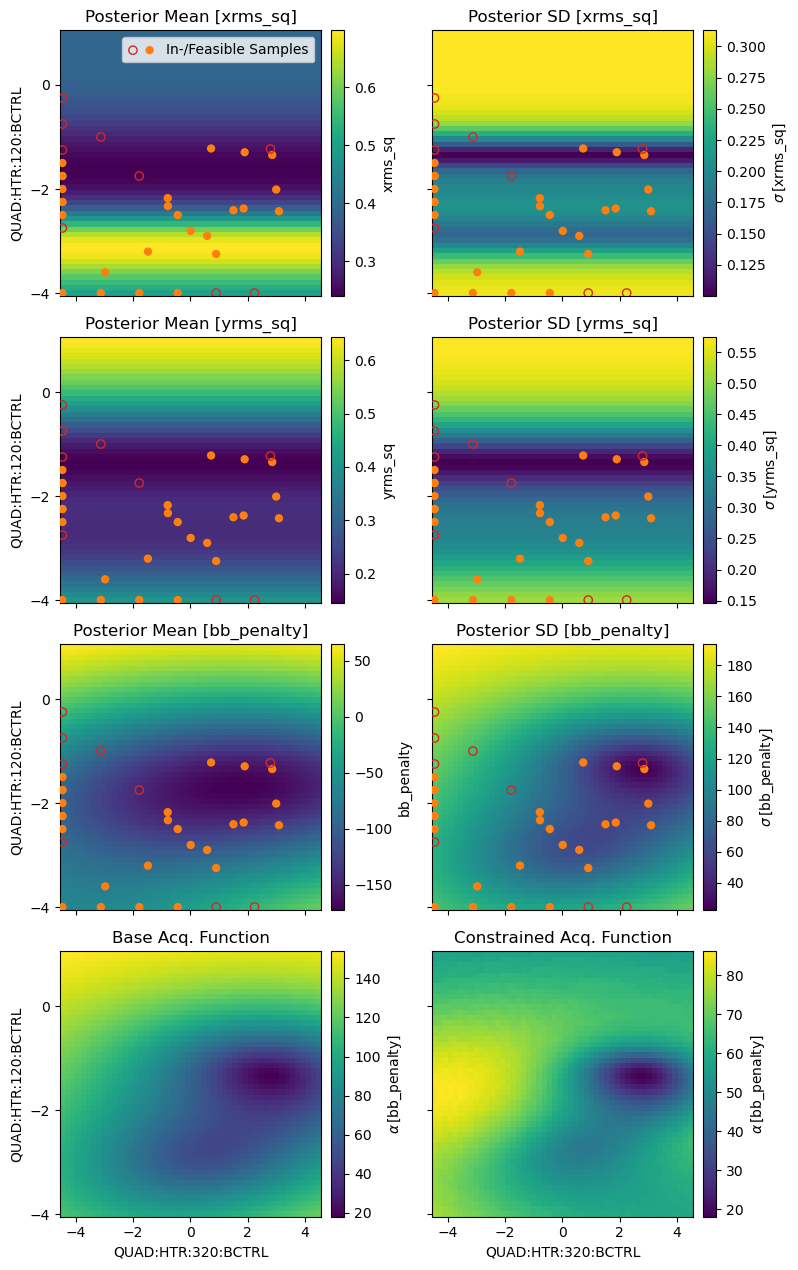

In [49]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bayes_exp.generator,
    variable_names=['QUAD:HTR:320:BCTRL','QUAD:HTR:120:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
)

#fig,ax = visualize_generator_model(
#    X_bayes_exp.generator,
#    variable_names=['QUAD:HTR:120:BCTRL','QUAD:GUNB:823:1:BCTRL'],
#    output_names=["xrms_sq","yrms_sq","bb_penalty"],
#)

#fig,ax = visualize_generator_model(
#    X_bayes_exp.generator,
#    variable_names=['QUAD:HTR:120:BCTRL','QUAD:GUNB:823:2:BCTRL'],
#    output_names=["xrms_sq","yrms_sq","bb_penalty"],
#)


# Run BAX

In [50]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
import torch
from test_algorithm import MinimizeEmitBmag

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {'xrms_sq': scaled_covar_module, "yrms_sq": deepcopy(scaled_covar_module)}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

QUAD_LENGTH = 0.124 # m
rmat_x = torch.tensor([[1.,   0.2481],
   [0.,   1.]])
rmat_y = torch.tensor([[1.,   0.2481],
[ 0.,    1.]])
THICK_QUAD = False
BEAM_ENERGY = 0.088 # GeV
SCALE_FACTOR = 2.74 # multiplicative factor to convert from measurement quad PV units to geometric focusing strength

algo_kwargs = {
        'x_key': "xrms_sq",
        'y_key': "yrms_sq",
        'scale_factor': SCALE_FACTOR,
        'q_len': QUAD_LENGTH,
        'rmat_x': rmat_x,
        'rmat_y': rmat_y,
        'n_samples': 20,
        'meas_dim': meas_dim,
        'n_steps_measurement_param': 11,
        'thick_quad': THICK_QUAD,
        'init': 'smallest',
        'scipy_options': {'maxiter':25},
        'jitter': 0.1,
        'twiss0_x':torch.tensor([5.011, .0487]),
        'twiss0_y':torch.tensor([5.011, .0487])
}
algo = MinimizeEmitBmag(**algo_kwargs)

# Initialize Xopt Optimizer

In [51]:
from xopt.generators.bayesian.bax_generator import BaxGenerator



#construct BAX generator
generator = BaxGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    algorithm=algo,
    #numerical_optimizer=GridOptimizer(n_grid_points=10),
    n_interpolate_points=5
)
generator.numerical_optimizer.max_time = 10.0
generator.numerical_optimizer.n_restarts = 128

#construct Xopt optimizer and add data
X_bax = Xopt(
    evaluator=evaluator,
    generator=generator,
    vocs=vocs,
    dump_file="run_results_2024_03_24/BAX_run_be_5.yml"
)
X_bax.add_data(X_bayes_exp.data)

In [52]:
import time
start = time.time()
for i in range(10):
    print(i)
    X_bax.step()
print(time.time() - start)

0
QUAD:HTR:120:BCTRL -1.444453890091718
QUAD:HTR:140:BCTRL 0.09869321234228956
QUAD:HTR:300:BCTRL -2.475997616688577
QUAD:HTR:320:BCTRL -3.02903095691525
fitting image
QUAD:HTR:120:BCTRL -1.3889077801834362
QUAD:HTR:140:BCTRL 0.19818608059888576
QUAD:HTR:300:BCTRL -2.7240377462708305
QUAD:HTR:320:BCTRL -1.5888818067138009
fitting image
QUAD:HTR:120:BCTRL -1.333361670275154
QUAD:HTR:140:BCTRL 0.29767894885548196
QUAD:HTR:300:BCTRL -2.9720778758530844
QUAD:HTR:320:BCTRL -0.148732656512351
fitting image
QUAD:HTR:120:BCTRL -1.2778155603668722
QUAD:HTR:140:BCTRL 0.39717181711207816
QUAD:HTR:300:BCTRL -3.2201180054353378
QUAD:HTR:320:BCTRL 1.2914164936890975
fitting image
QUAD:HTR:120:BCTRL -1.2222694504585903
QUAD:HTR:140:BCTRL 0.4966646853686743
QUAD:HTR:300:BCTRL -3.4681581350175916
QUAD:HTR:320:BCTRL 2.7315656438905456
fitting image
1
QUAD:HTR:120:BCTRL -1.7752802825235328
QUAD:HTR:140:BCTRL 0.7048461945575795
QUAD:HTR:300:BCTRL -3.286339569985594
QUAD:HTR:320:BCTRL 2.3373152251118507
fi

In [53]:
X_bax.dump()

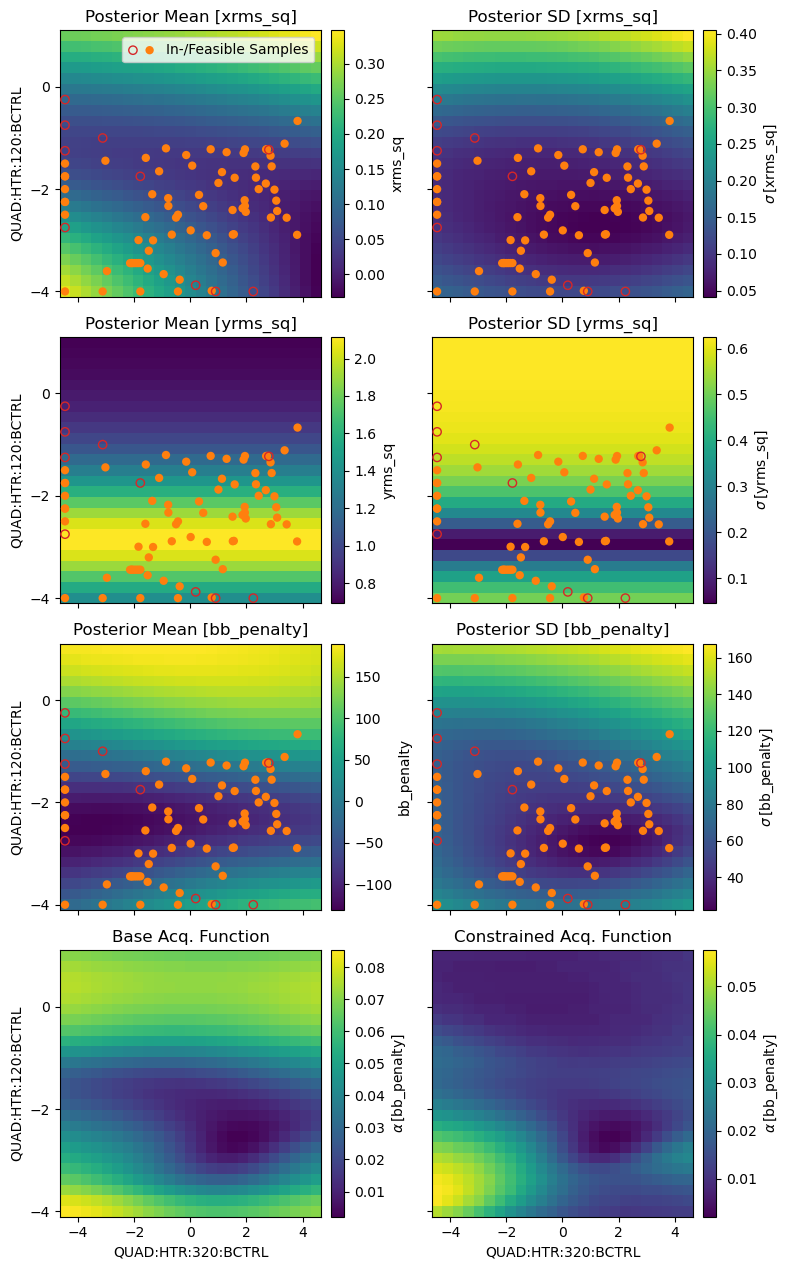

In [54]:
X_bax.generator.train_model()
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:320:BCTRL','QUAD:HTR:120:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
    n_grid=25
)


## view data and model

{'QUAD:HTR:120:BCTRL': tensor(-1.5556, dtype=torch.float64), 'QUAD:HTR:140:BCTRL': tensor(2.1382, dtype=torch.float64), 'QUAD:HTR:300:BCTRL': tensor(-0.7397, dtype=torch.float64)}


(<Figure size 900x600 with 6 Axes>,
 array([[<Axes: xlabel='QUAD:HTR:120:BCTRL', ylabel='Emittance'>,
         <Axes: xlabel='QUAD:HTR:140:BCTRL'>,
         <Axes: xlabel='QUAD:HTR:300:BCTRL'>],
        [<Axes: xlabel='QUAD:HTR:120:BCTRL', ylabel='Sample Validity Rate'>,
         <Axes: xlabel='QUAD:HTR:140:BCTRL'>,
         <Axes: xlabel='QUAD:HTR:300:BCTRL'>]], dtype=object))

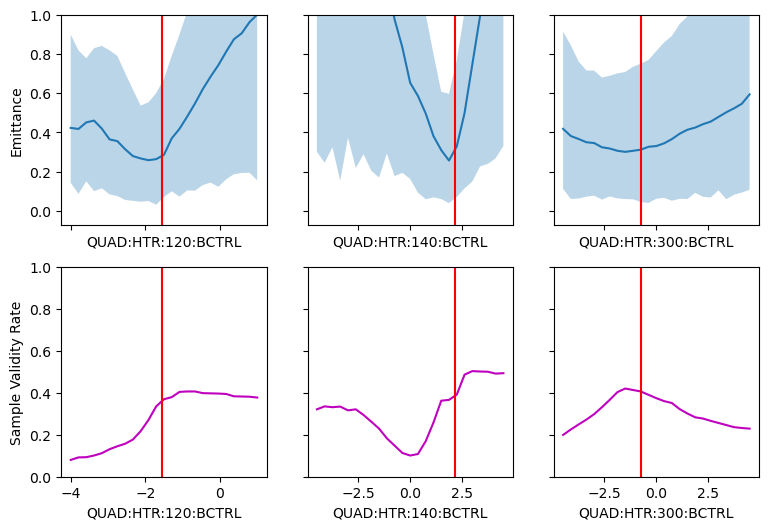

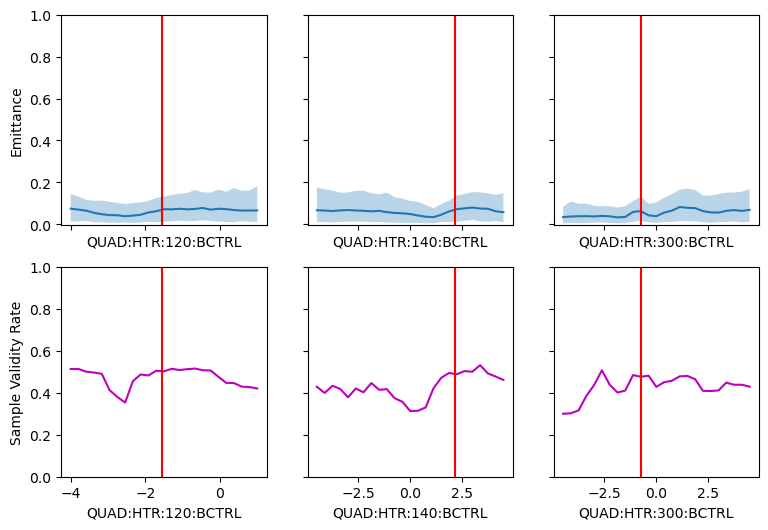

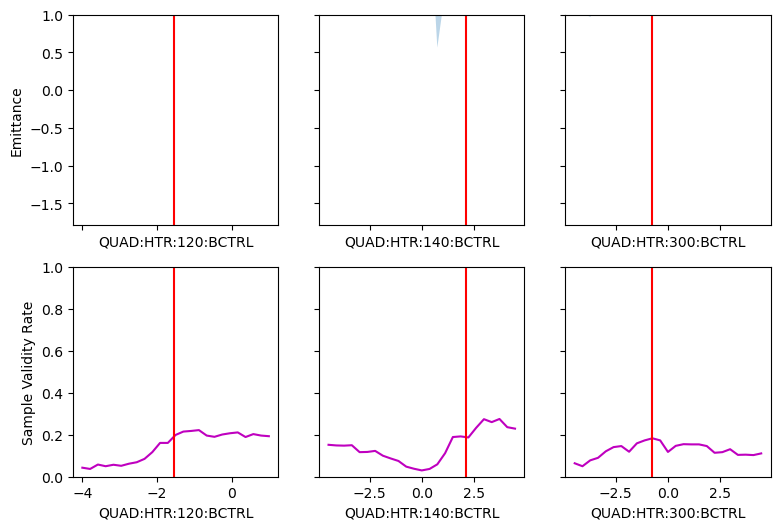

In [60]:
from test_algorithm import plot_virtual_emittance
from emitopt.utils import get_bax_optimum
best_x = get_bax_optimum(X_bax.generator)
print(best_x)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="x"
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="y"
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, use_bmag=True
)

torch.Size([1000, 25])
torch.Size([1000, 25, 1])
torch.Size([1000, 25])
torch.Size([1000, 25, 1])
torch.Size([1000, 25])
torch.Size([1000, 25, 1])


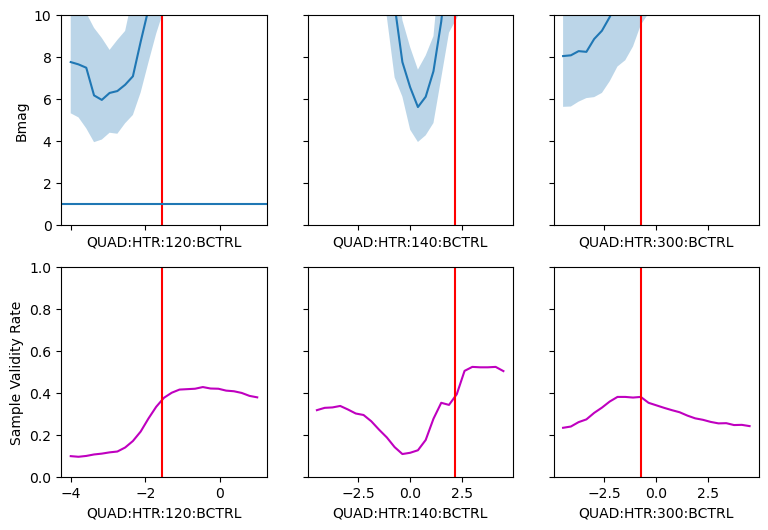

In [58]:
import copy
def plot_virtual_bmag(
    optimizer, reference_point, dim='xy', ci=0.95, tkwargs:dict=None, 
    n_points = 50, n_samples=1000, y_max=1., use_bmag=False
):
    """
    Plots the Bmag cross-sections corresponding to the GP posterior beam size model. 
    This function uses n_samples to produce a confidence interval.
    It DOES NOT use the pathwise sample functions, but rather draws new samples using BoTorch's 
    built-in posterior sampling.
    """
    tkwargs = tkwargs if tkwargs else {"dtype": torch.double, "device": "cpu"}
    x_origin = []
    for name in optimizer.generator.vocs.variable_names:
        if name in reference_point.keys():
            x_origin += [torch.tensor(reference_point[name]).reshape(1,1)]
    x_origin = torch.cat(x_origin, dim=1)    
    #extract GP models
    model = optimizer.generator.train_model()
    if len(optimizer.generator.algorithm.observable_names_ordered) == 2:
        if dim == 'x':
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            algorithm.y_key = None
            bax_model_ids = [optimizer.generator.vocs.output_names.index(algorithm.x_key)]
        elif dim == 'y':
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            algorithm.x_key = None
            bax_model_ids = [optimizer.generator.vocs.output_names.index(algorithm.y_key)]
        else:
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            bax_model_ids = [optimizer.generator.vocs.output_names.index(name)
                                    for name in optimizer.generator.algorithm.observable_names_ordered]
    bax_model = model.subset_output(bax_model_ids)
    meas_dim = algorithm.meas_dim
    
    bounds = optimizer.generator._get_optimization_bounds()
    tuning_domain = torch.cat((bounds.T[: meas_dim], bounds.T[meas_dim + 1:]))
    
    tuning_param_names = optimizer.vocs.variable_names
    del tuning_param_names[meas_dim]
        
    n_tuning_dims = x_origin.shape[1]
    
    fig, axs = plt.subplots(2, n_tuning_dims, sharex='col', sharey='row')
    fig.set_size_inches(3*n_tuning_dims, 6)
        
    for i in range(n_tuning_dims):
        # do a scan of the posterior emittance (via valid sampling)
        x_scan = torch.linspace(*tuning_domain[i], n_points, **tkwargs)
        x_tuning = x_origin.repeat(n_points, 1)
        x_tuning[:,i] = x_scan
        target, emit, bmag, is_valid, validity_rate, bss = algorithm.evaluate_target(bax_model, 
                                                                                   x_tuning, 
                                                                                   bounds,
                                                                                   tkwargs,
                                                                                   n_samples,
                                                                                   transform_target=False,
                                                                                   use_bmag=use_bmag)
        print(target.shape)
        print(bmag.shape)
        quants = torch.tensor([])
        
        for j in range(len(x_scan)):
            cut_ids = torch.tensor(range(len(bmag[:,j])), device=tkwargs['device'])[is_valid[:,j]]
            bmag_valid = torch.index_select(bmag[:,j], dim=0, index=cut_ids)
            q = torch.tensor([(1.-ci)/2., 0.5, (1.+ci)/2.], **tkwargs)
            if len(cut_ids)>=10:
                quant = torch.quantile(bmag_valid, q=q, dim=0).reshape(1,-1)
            else:
                quant = torch.tensor([[float('nan'), float('nan'), float('nan')]], **tkwargs)
            quants = torch.cat((quants, quant))

        if n_tuning_dims==1:
            ax = axs[0]
        else:
            ax = axs[0,i]
        ax.fill_between(x_scan, quants[:,0], quants[:,2], alpha=0.3)
        ax.plot(x_scan, quants[:,1])
        ax.axvline(x_origin[0,i], c='r')
        
        ax.set_xlabel(tuning_param_names[i])
        if i==0:
            ax.set_ylabel('Bmag')
            #ax.set_ylim(top=y_max)
        if n_tuning_dims==1:
            ax = axs[1]
        else:
            ax = axs[1,i]
        ax.plot(x_scan, validity_rate, c='m')
        ax.axvline(x_origin[0,i], c='r')
        ax.set_ylim(0,1)

        ax.set_xlabel(tuning_param_names[i])
        if i==0:
            ax.set_ylabel('Sample Validity Rate')
            
    return fig, axs

fig,ax = plot_virtual_bmag(
    X_bax, best_x, 
    n_points=25, dim="x",use_bmag=True,n_samples=1000,ci=0.5
)
ax[0,0].set_ylim(0,10)
ax[0,0].axhline(1.0)

In [ ]:
X_bax.vocs.normalize_inputs(X_bax.data).plot(y=X_bax.vocs.variable_names)

In [ ]:
from emitopt.plot_utils import plot_sample_optima_convergence_inputs
fig, axs = plot_sample_optima_convergence_inputs(results, show_valid_only=False)

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = best_x
)
ax[1].set_ylim(0,1.0)

In [ ]:
ax[1].set_ylim(0,0.15)
fig

In [61]:
best_x

{'QUAD:HTR:120:BCTRL': tensor(-1.5556, dtype=torch.float64),
 'QUAD:HTR:140:BCTRL': tensor(2.1382, dtype=torch.float64),
 'QUAD:HTR:300:BCTRL': tensor(-0.7397, dtype=torch.float64)}

In [55]:
reference

{'QUAD:COL0:320:BCTRL': 0.87065,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'SOLN:GUNB:823:BCTRL': 0.025}

In [62]:
best_x = {name: float(val) for name,val in best_x.items()} | {'QUAD:HTR:120:BCTRL':-2.0}

In [63]:
best_x

{'QUAD:HTR:120:BCTRL': -2.0,
 'QUAD:HTR:140:BCTRL': 2.1382064819335938,
 'QUAD:HTR:300:BCTRL': -0.7397024869918823}

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = {'SOLN:GUNB:823:BCTRL': 0.022}
)


In [57]:
X_bax.evaluate_data(best_x)

QUAD:GUNB:823:1:BCTRL 0.0017187776684295386
QUAD:GUNB:823:2:BCTRL 0.0012197776581160725
SOLN:GUNB:823:BCTRL 0.025367110688239335
QUAD:HTR:120:BCTRL -2.0
fitting image


,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,SOLN:GUNB:823:BCTRL,QUAD:HTR:120:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:COL0:320:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.001719,0.00122,0.025367,-2.0,293.791551,285.56277,282.617772,188.083224,-233.344599,457608.6,...,0.0,0.0,0.87065,1.711339e+09,0.282618,0.188083,0.079873,0.035375,3.25353,False


In [ ]:
X_bax.evaluate_data({'SOLN:GUNB:823:BCTRL': 0.028, 'QUAD:HTR:120:BCTRL': -2.0})

In [64]:
best_x['QUAD:HTR:120:BCTRL'] = -1.5556

In [65]:
best_x

{'QUAD:HTR:120:BCTRL': -1.5556,
 'QUAD:HTR:140:BCTRL': 2.1382064819335938,
 'QUAD:HTR:300:BCTRL': -0.7397024869918823}

In [67]:
X_bax.evaluate_data(best_x)

KeyError: "['QUAD:HTR:320:BCTRL'] not in index"